In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# path = "C:/Users/ajayc/Desktop/Fractal-Dimension/c1.jpg"
path="c1.jpg"

In [3]:
# Read the image
# im = cv2.imread('F:/white.jpg', cv2.IMREAD_GRAYSCALE)
im = cv2.imread(path, cv2.IMREAD_GRAYSCALE)

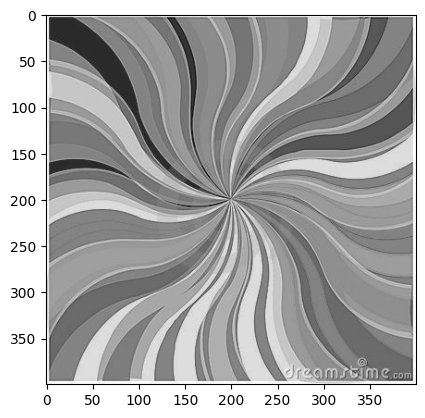

In [4]:
# Display the image
# plt.subplot(3, 3, 1)
plt.imshow(im, cmap='gray')

In [5]:
M = 256
G = 256
scale = []
Nr = []
l = 2

In [6]:
while l < (M / 2):
    r = l
    blockSizeR = r
    blockSizeC = r
    ld = (l * 256) / M
    nr = 0
    for row in range(0, M, blockSizeR):
        for col in range(0, M, blockSizeC):
            row1 = row
            row2 = row1 + blockSizeR - 1
            col1 = col
            col2 = col1 + blockSizeC - 1

            # Extract block
            oneBlock = im[row1:row2+1, col1:col2+1]
            maxI = np.max(oneBlock)
            minI = np.min(oneBlock)

            # Number of boxes
            nb = np.ceil(float(maxI) / ld)
            if maxI == minI:
                nr += 1
            else:
                nr += nb

    Nr.append(np.sum(nr))
    scale.append(M / l)
    l = l * 2

Dimension = 2.8228624050654685


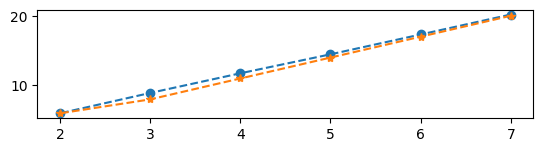

In [7]:
plt.subplot(3, 1, 2)
N = np.log(Nr) / np.log(2)
S = np.log(scale) / np.log(2)
p = np.polyfit(S, N, 1)
f = np.floor(np.polyval(p, S))
print(f'Dimension = {p[0]}')
plt.plot(S, N, 'o--', S, f, '*--')

In [8]:
m = p[0]
c = p[1]

In [9]:
y = 0
for j in range(len(N)):
    x = (((m * S[j]) + c) - N[j]) / (1 + (m * m))
    if x < 0:
        y += x * -1
    else:
        y += x

In [10]:
n = len(N)
E = (1 / n) * np.sqrt(y)
print(f'Error = {E}')
plt.show()

Error = 0.02746081301015731
